## LOGISTIC REGRESSION

In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

# Load data
df=pd.read_csv(r"C:\Users\rithy\OneDrive\Desktop\framingham.csv")

# Explore data
df.info()

# imputing mode for missing categorical data
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

# imputing mean for missing continuous data
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

# No duplicates found
df.duplicated().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


C:\Users\rithy\AppData\Local\Temp\ipykernel_35492\1840905496.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)
C:\Users\rithy\AppData\Local\Temp\ipykernel_35492\1840905496.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

np.int64(0)

### Logistic Regression from scratch

In [13]:
def sigmoid(x): # Sigmoid function
    return 1/(1+np.exp(-x))
    
class LogisticRegressionScratch(): 
    def __init__(self,lr=.001,n_iter=1000):
     self.lr=lr
     self.n_iter=n_iter
     self.weights=None 
     self.bias=None
        

    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features) # Initialize weights and bias to Zero
        self.bias=0
        self.loss_history = []

        for _ in range(self.n_iter):
            linear_pred=np.dot(X,self.weights)+self.bias # y= mx + c
            predictions=sigmoid(linear_pred)

            loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.loss_history.append(loss)

            dw=(1/n_samples)*np.dot(X.T,(predictions-y)) # dw = 1/N *X(Y-y)
            db=(1/n_samples)*np.sum(predictions-y)       # db = 1/N *(Y-y)

            self.weights=self.weights-self.lr*dw  # w = w - alpha*dw
            self.bias=self.bias-self.lr*db        # b = b - alpha*db
            
    def predict(self,X):        # Predivtions
        linear_pred=np.dot(X,self.weights)+self.bias
        predictions=sigmoid(linear_pred)
        class_pred=[0 if y<=0.5
                    else 1 for y in predictions]
        return class_pred

# Scaler function from scratch
class StandardScalerScratch:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std[self.std == 0] = 1  # avoid division by zero
        

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



### Comparing both models

In [11]:
X = df.drop(['TenYearCHD'], axis=1) # Features
y = df['TenYearCHD'] # Target labels

# Splitting data , stratify=y for keeping  class balance
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2,random_state=42,stratify=y)

# Scaling data from scratch
scaler = StandardScalerScratch()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling data from skikit learn
scaler = StandardScaler()
X_train_scaledsk = scaler.fit_transform(X_train)
X_test_scaledsk = scaler.transform(X_test)

# Logistic Regression from scratch
start_time = time.time()  # to calculate training time
clf = LogisticRegressionScratch(lr=0.01)
clf.fit(X_train_scaled,y_train)
end_time = time.time()
training_time_scratch= end_time - start_time
y_pred_scratch = clf.predict(X_test_scaled)

# Using Logistic Regression using scikit 
start_time = time.time()  # to calculate training time
logreg = LogisticRegression(random_state=16 )
logreg.fit(X_train_scaledsk, y_train)  # fit the model with data
end_time = time.time()
training_time_scikit= end_time - start_time
y_pred = logreg.predict(X_test_scaledsk)

# Comparing performance with classification report

print("Logistic Regression from Scratch — Classification Report\n")
print(
    classification_report(y_test,y_pred_scratch,
        target_names=["Without Heart Disease (0)", "With Heart Disease (1)"]
    )
)
print("Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("Training Time:", round(training_time_scratch, 4))


print("\nLogistic Regression using Scikit-learn — Classification Report\n")
print(
    classification_report(y_test,y_pred,target_names=["Without Heart Disease (0)", "With Heart Disease (1)"]
    )
)
print("Accuracy:", accuracy_score(y_test, y_pred))   
print("Training Time:", round(training_time_scikit, 4))

Logistic Regression from Scratch — Classification Report

                           precision    recall  f1-score   support

Without Heart Disease (0)       0.86      0.99      0.92       719
   With Heart Disease (1)       0.62      0.08      0.14       129

                 accuracy                           0.85       848
                macro avg       0.74      0.53      0.53       848
             weighted avg       0.82      0.85      0.80       848

Accuracy: 0.8525943396226415
Training Time: 3.0712

Logistic Regression using Scikit-learn — Classification Report

                           precision    recall  f1-score   support

Without Heart Disease (0)       0.86      0.99      0.92       719
   With Heart Disease (1)       0.50      0.07      0.12       129

                 accuracy                           0.85       848
                macro avg       0.68      0.53      0.52       848
             weighted avg       0.80      0.85      0.80       848

Accuracy: 0.8478

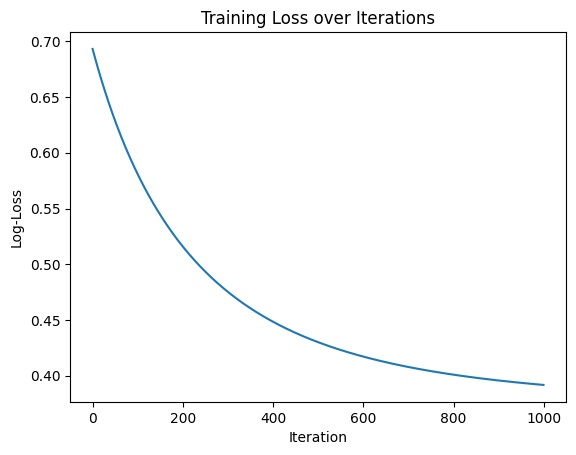

In [15]:
# Cost function (Loss) Curve
plt.plot(clf.loss_history)
plt.title("Training Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log-Loss")
plt.show()

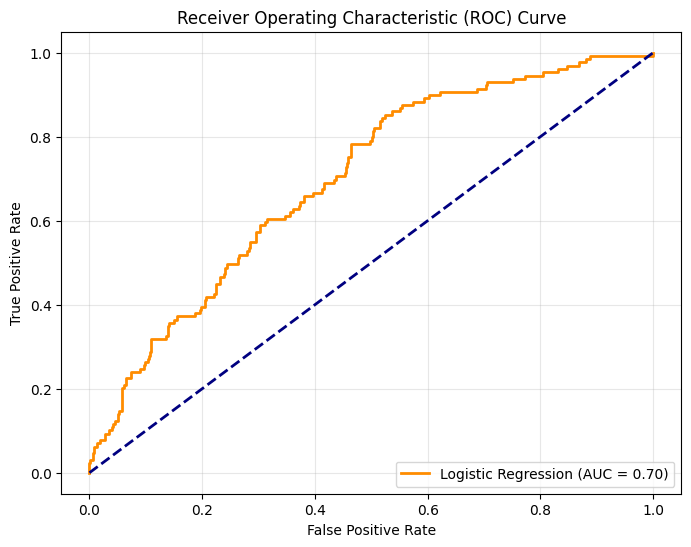

In [14]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = logreg.predict_proba(X_test_scaledsk)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

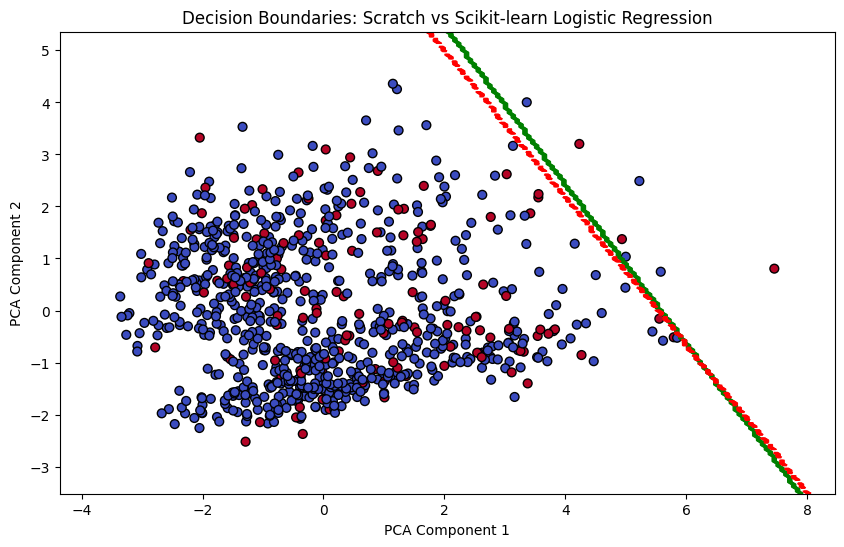

In [5]:
from sklearn.decomposition import PCA

# Reduce data to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

def plot_decision_boundary(model, X_2d, color='green', linestyle='-'):
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(grid)
    Z = np.array(Z).reshape(xx.shape)

    plt.contour(xx, yy, Z, colors=color, linestyles=linestyle)
plt.figure(figsize=(10,6))

# Scatter plot of test data
plt.scatter(
    X_test_2d[:,0],
    X_test_2d[:,1],
    c=y_test,
    cmap="coolwarm",
    s=40,
    edgecolor="k"
)

# Scratch model boundary
plot_decision_boundary(clf, X_test_2d, color="green", linestyle='-')

# Scikit-learn model boundary
plot_decision_boundary(logreg, X_test_2d, color="red", linestyle='--')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundaries: Scratch vs Scikit-learn Logistic Regression")
plt.show()
